<a href="https://colab.research.google.com/github/NguyenVanLuu821/AI_Excerise_week13/blob/main/Fashion_mnist_cnn_w13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Import library

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Activation, Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Optimizer
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array

#2.Import file and load data

In [17]:
(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()

In [18]:
#handling data
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train = x_train/255
x_test  = x_test/255

In [19]:
# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

#3.Cteate model

In [22]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))#layer 1
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same')) #layer2
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation = 'relu')) #layer3
model.add(Dropout(0.25))

model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 14, 14, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                 

#4.Training

In [23]:
model.compile(optimizer= Adam(),loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,batch_size = 32, epochs = 10,verbose = 1, validation_data =(x_test,y_test))

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.8418 - accuracy: 0.6884 - val_loss: 0.4374 - val_accuracy: 0.8440
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.5183 - accuracy: 0.8094 - val_loss: 0.3800 - val_accuracy: 0.8642
Epoch 3/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4588 - accuracy: 0.8272 - val_loss: 0.3420 - val_accuracy: 0.8719
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4266 - accuracy: 0.8412 - val_loss: 0.3227 - val_accuracy: 0.8832
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4032 - accuracy: 0.8501 - val_loss: 0.3222 - val_accuracy: 0.8843
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3808 - accuracy: 0.8593 - val_loss: 0.2966 - val_accuracy: 0.8955
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.3701 - accuracy: 0.8623 - val_loss: 0.2890 -

In [24]:
#save model
model_json = model.to_json()
with open('fashion_mnist_cnn.json','w') as file_json:
  file_json.write(model_json)
model.save_weights('fashion_mnist_cnn.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


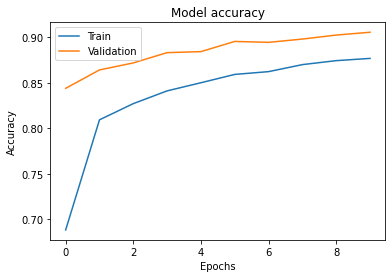

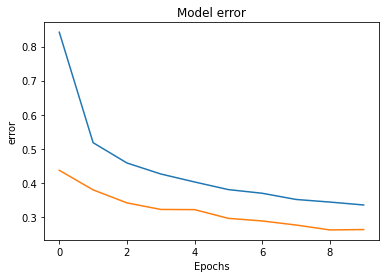

In [25]:
#plot figure
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model error')
plt.ylabel('error')
plt.xlabel('Epochs')
plt.show()